# Cat and Dog Classification by CNN

The objective of this project is to construct a Convolutional Neural Network (CNN) capable of classifying images of dogs and cats. By utilizing the power of deep learning and convolutional layers, we seek to create a model that can accurately distinguish between these two distinct animal categories based on the visual features present in the images.

The dataset for this investigation consists of a large collection of images featuring dogs and cats. Each image is labeled as '1' or '0' for dogs and cats respectively. By training the CNN on this dataset, we intend to develop a predictive model that can automatically identify whether an input image contains a dog or a cat.

It is hypothesized that CNNs, specifically designed for image-based tasks, will be well-suited for this classification challenge. CNNs are known for their ability to recognize patterns, edges, and textures in images, making them ideal for image classification tasks. Additionally, the hierarchical structure of convolutional layers allows the model to learn increasingly complex features as it progresses through the layers.

We anticipate that the accuracy of predictions will be notably influenced by the depth and complexity of the chosen CNN architecture.Deeper architectures tend to capture more intricate details but may also be susceptible to overfitting if not properly regularized. Regularization techniques such as dropout and batch normalization will be employed to mitigate overfitting concerns.

While a well-designed CNN should be able to achieve a high accuracy rate, the final outcome will heavily depend on the quality and diversity of the training dataset.

**Importing important libaries**

In [45]:
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras import utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten, InputLayer
import keras
import imageio # To read images
from PIL import Image # For image resizing
from sklearn.model_selection import train_test_split


**Loading and Displaying Image**

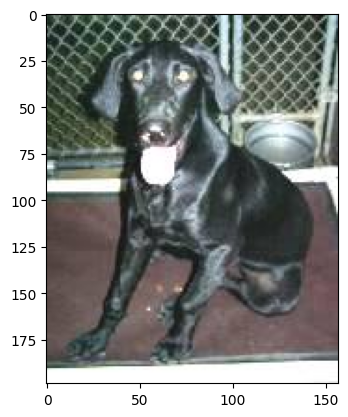

In [109]:
filenames = os.listdir("train")
sample = random.choice(filenames)
image = load_img("train/"+sample)
plt.imshow(image)

In [110]:
import pandas as pd
filenames = os.listdir("train")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head()

,filename,category
0,dog.62.jpg,1
1,dog.2.jpg,1
2,dog.80.jpg,1
3,dog.32.jpg,1
4,dog.57.jpg,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  402 non-null    object
 1   category  402 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ KB


**Splitting dataset into train and test data**

In [111]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=0)
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)





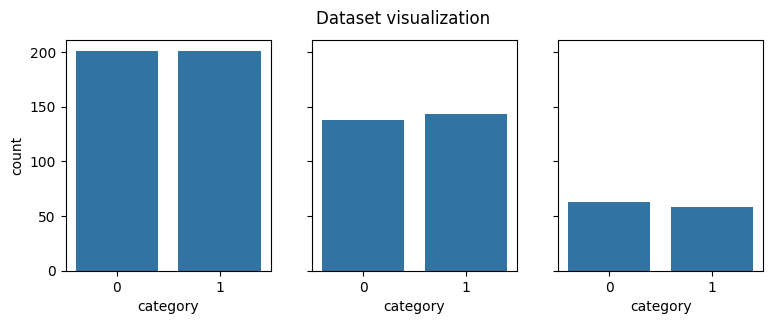

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(9, 3))
sns.countplot(x='category',data=df, ax=ax[0])
sns.countplot(x='category',data=train_df, ax=ax[1])
sns.countplot(x='category',data=test_df, ax=ax[2])
fig.suptitle('Dataset visualization')
plt.show()

**Reshaping all images to the same size of 32*32**

In [9]:
temp = []
for img_name in train_df['filename']:  # Access the 'image' column using train_df['image']
    img_path = os.path.join("/content/train", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
train_x = np.stack(temp)

<ipython-input-9-e45414202fc6>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


In [10]:
temp = []
for img_name in test_df['filename']:  # Access the 'image' column using train_df['image']
    img_path = os.path.join("/content/train", img_name)
    img = imageio.imread(img_path)
    img = np.array(Image.fromarray(img).resize((32, 32))).astype('float32')
    temp.append(img)
test_x = np.stack(temp)

<ipython-input-10-a15050aff2bb>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_path)


**Normalizing the Images**

In [11]:
train_x = train_x / 255.
test_x = test_x / 255.

# Encoding the categorical variable to numeric
lb = LabelEncoder()
train_y = lb.fit_transform(train_df.category)

train_y = to_categorical(train_y)

In [12]:
test_y = lb.fit_transform(test_df.category)
test_y = to_categorical(test_y)

**Convotional Neural Network Model**

In [58]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(512, activation='relu'))



model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 4, 4, 128)       

In [62]:
history= model.fit(train_x, train_y, epochs= 20, verbose=1, validation_split=0.5)

Epoch 1/20
5/5 [==============================] - 0s 70ms/step - loss: 0.0771 - accuracy: 0.9786 - val_loss: 0.8465 - val_accuracy: 0.6454
Epoch 2/20
5/5 [==============================] - 0s 59ms/step - loss: 0.1204 - accuracy: 0.9714 - val_loss: 0.7271 - val_accuracy: 0.7021
Epoch 3/20
5/5 [==============================] - 0s 58ms/step - loss: 0.0845 - accuracy: 0.9714 - val_loss: 0.7322 - val_accuracy: 0.6950
Epoch 4/20
5/5 [==============================] - 0s 59ms/step - loss: 0.0411 - accuracy: 1.0000 - val_loss: 0.7999 - val_accuracy: 0.7447
Epoch 5/20
5/5 [==============================] - 0s 57ms/step - loss: 0.0263 - accuracy: 1.0000 - val_loss: 0.8022 - val_accuracy: 0.7163
Epoch 6/20
5/5 [==============================] - 0s 56ms/step - loss: 0.0277 - accuracy: 0.9929 - val_loss: 1.2554 - val_accuracy: 0.6738
Epoch 7/20
5/5 [==============================] - 0s 57ms/step - loss: 0.0499 - accuracy: 0.9929 - val_loss: 0.9062 - val_accuracy: 0.7163
Epoch 8/20
5/5 [===========

**Visualizing Result (Loss And Accuracy of the Model)**

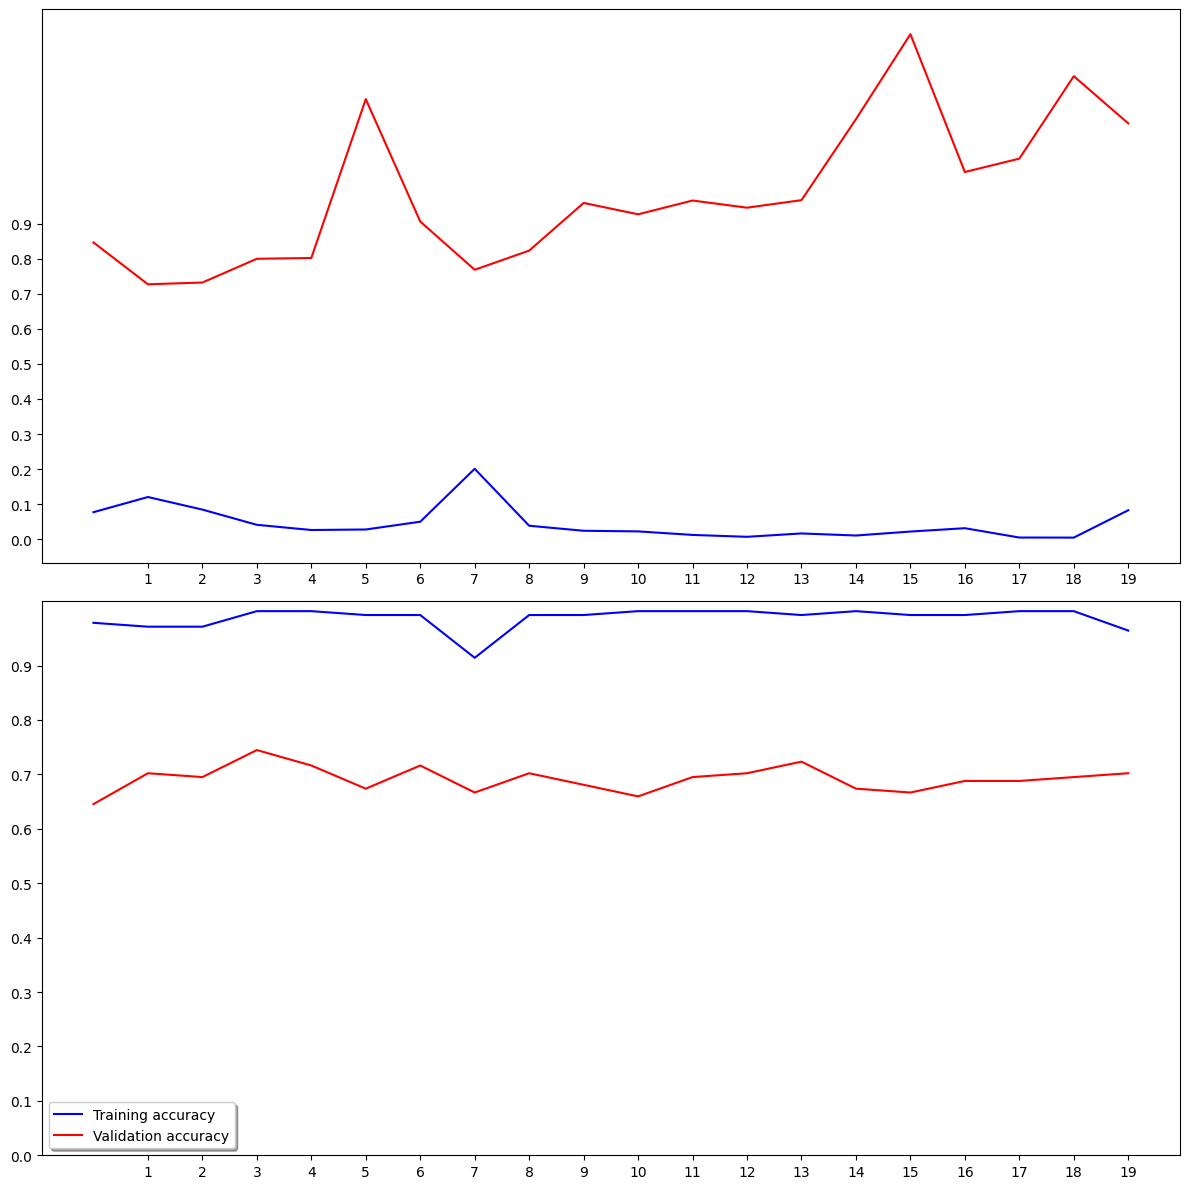

In [64]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))
ax2.set_yticks(np.arange(0, 1, 0.1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [67]:
idx2 = random.randint(0, len(test_x) - 1)


plt.show()

In [72]:
# Make predictions for the single image
y_pred = model.predict(test_x[idx2,:].reshape(1,32,32,3))

# Convert predictions to binary (True/False) based on the threshold of 0.5
binary_predictions = y_pred > 0.5

# Print the predictions
print("Predictions:", binary_predictions)

1/1 [==============================] - 0s 374ms/step
Predictions: [[False  True]]


In [73]:
# Find the index of the maximum value in y_pred
pred_class = np.argmax(y_pred)

# Check if the predicted class is 0 (assuming 0 represents "dog")
if pred_class == 0:
    pred = "DOG"
else:
    pred = "CAT"

print("Our model says it is:", pred)

Our model says it is: CAT


<ipython-input-87-966791c817f3>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(os.path.join("/content/train", str(img_name)))


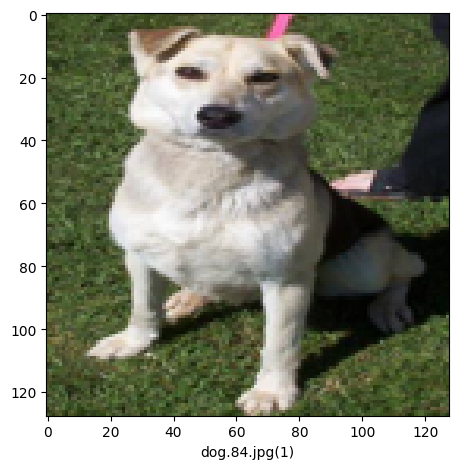

In [87]:
np.random.seed(10)
idx = np.random.choice(test_df.index)
img_name = test_df['filename'][idx]  # Corrected access using square brackets
img = imageio.imread(os.path.join("/content/train", str(img_name)))
plt.imshow(np.array(Image.fromarray(img).resize((128, 128))))
plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

**Prediction on Test Data**

In [124]:
test_filenames = os.listdir("/content/test")
test_df = pd.DataFrame({
    'image': test_filenames
})
nb_samples = test_df.shape[0]

In [125]:
from keras.preprocessing.image import * #ImageDataGenerator, load_img
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    "/content/test",
    x_col='image',
    y_col=None,
    class_mode=None,
    target_size=(32,32),
    shuffle=False
)

Found 400 validated image filenames.


In [107]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples))

<ipython-input-107-87dfca769d45>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples))


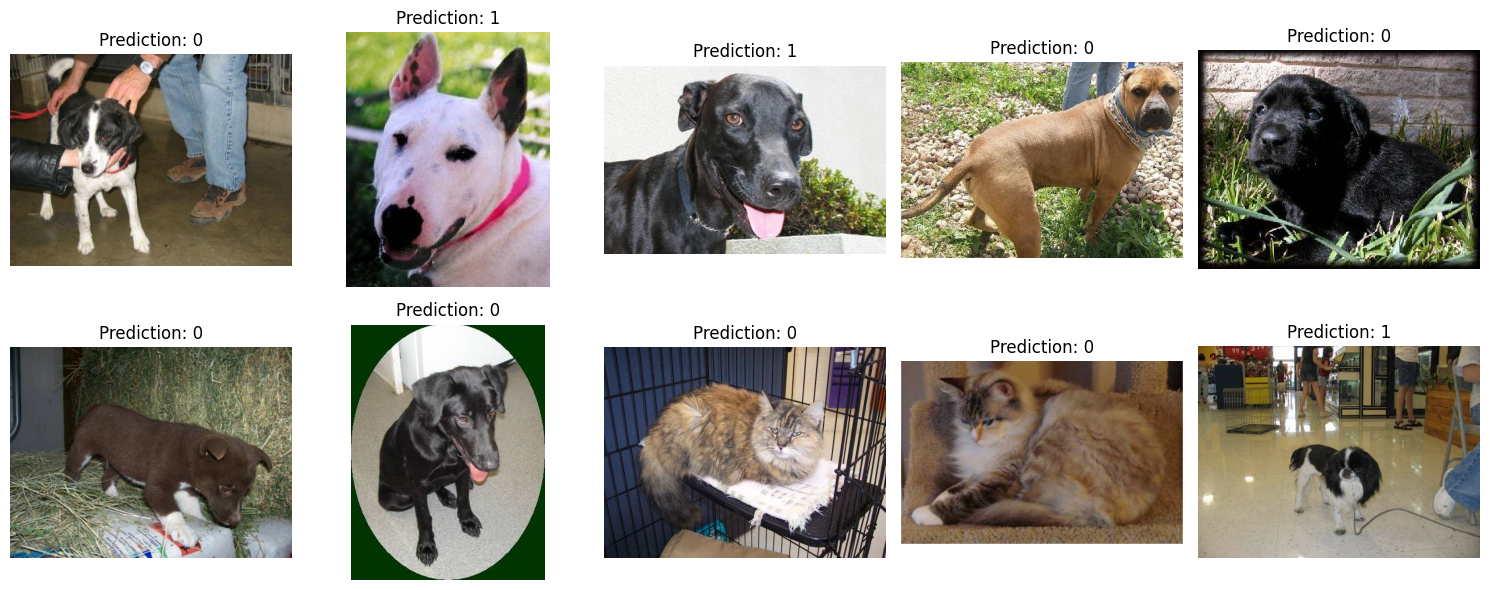

In [131]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axs.flat):
    img_path = os.path.join("/content/test", test_df['image'][i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(f"Prediction: {test_df['labels'][i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()